# Neural Prophet Espanha

In [ ]:
# Instalando a blibioteca
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando as Blibiotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20Espanha.csv'

serie_esp = pd.read_csv(url)
serie_esp.drop('Unnamed: 0',axis=1,inplace=True)
serie_esp.head()

,Date,Confirmed,Recovered,Deaths,Ano,Mês
0,2020-01-22,0,0.0,0,2020,1
1,2020-01-23,0,0.0,0,2020,1
2,2020-01-24,0,0.0,0,2020,1
3,2020-01-25,0,0.0,0,2020,1
4,2020-01-26,0,0.0,0,2020,1


In [ ]:
serie_esp = serie_esp[['Date','Deaths']]
serie_esp.columns = ['ds','y']
serie_esp.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
treino = serie_esp[0:679]
teste = serie_esp[679:710]

In [ ]:
treino

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
674,2021-11-26,87955
675,2021-11-27,87955
676,2021-11-28,87955
677,2021-11-29,88008


In [ ]:
modelo = NeuralProphet(seasonality_mode='additive', num_hidden_layers=10, 
                       d_hidden=10, learning_rate=0.20, batch_size=25, epochs=15,n_forecasts=31,
                        daily_seasonality=False)

In [ ]:
metrics = modelo.fit(treino, freq='D') 

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-pac

Training: 0it [00:00, ?it/s]

In [ ]:
future = modelo.make_future_dataframe(treino, periods=len(teste))
forecast = modelo.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 28it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast
     

,ds,y,yhat1,trend,season_weekly
0,2021-12-01,None,88110.414062,88136.796875,-26.389124
1,2021-12-02,None,88197.976562,88176.414062,21.557230
2,2021-12-03,None,88221.007812,88216.031250,4.977624
3,2021-12-04,None,88280.382812,88255.648438,24.737923
4,2021-12-05,None,88153.000000,88295.273438,-142.272430
5,2021-12-06,None,88306.593750,88334.890625,-28.294880
6,2021-12-07,None,88520.203125,88374.515625,145.683655
7,2021-12-08,None,88387.742188,88414.132812,-26.389124
8,2021-12-09,None,88475.312500,88453.750000,21.557230
9,2021-12-10,None,88498.351562,88493.375000,4.977624


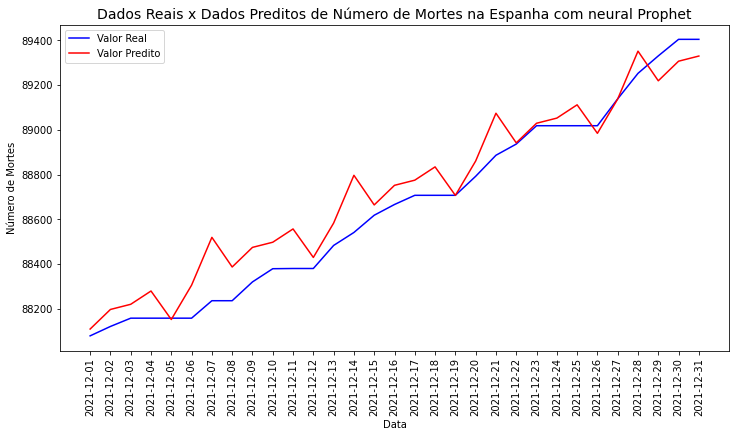

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Dados Reais x Dados Preditos de Número de Mortes na Espanha com neural Prophet',
          fontsize=14)
plt.plot(teste.ds,teste.y,color='blue',label='Valor Real')
plt.plot(teste.ds,forecast.yhat1,color='red',label='Valor Predito')
plt.xticks(rotation=90)
plt.xlabel('Data')
plt.ylabel('Número de Mortes')
plt.legend();

In [ ]:
print('MAPE:',mean_absolute_percentage_error(teste.y,forecast.yhat1))
print('MAE:',mean_absolute_error(teste.y,forecast.yhat1))
print('RMSE:',np.sqrt(mean_squared_error(teste.y,forecast.yhat1)))

MAPE: 0.0010471201717414085
MAE: 92.75504032258064
RMSE: 115.76494721783135


In [ ]:
teste['pred'] = list(forecast['yhat1'])
teste['dif'] = teste['pred'] - teste['y'] 
teste

WARNING - (py.warnings._showwarnmsg) - <ipython-input-273-e006053e894e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['pred'] = list(forecast['yhat1'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['pred'] = list(forecast['yhat1'])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-273-e006053e894e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,ds,y,pred,dif
679,2021-12-01,88080,88110.414062,30.414062
680,2021-12-02,88122,88197.976562,75.976562
681,2021-12-03,88159,88221.007812,62.007812
682,2021-12-04,88159,88280.382812,121.382812
683,2021-12-05,88159,88153.000000,-6.000000
684,2021-12-06,88159,88306.593750,147.593750
685,2021-12-07,88237,88520.203125,283.203125
686,2021-12-08,88237,88387.742188,150.742188
687,2021-12-09,88321,88475.312500,154.312500
688,2021-12-10,88380,88498.351562,118.351562


In [ ]:
teste.to_csv('teste_neural_prophet_espanha.csv')

In [ ]:
treino.to_csv('treino_espanha.csv')